# Problem Set 2

1. a)

In [1]:
#libraries

library("readxl")
library("SciViews")
library("dplyr")
library("psych")
library("haven")

df = read_dta('HW2data/ceo_salary.dta')

head(df, n=10)

model <- lm(lsalary ~ lsales + lmktval + ceoten + I(ceoten^2), data = df)
summary(model)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
1161,49,1,1,9,2,6200,966,23200,7.057037,8.732305,10.051908,81,4,15.580646
600,43,1,1,10,10,283,48,1100,6.396930,5.645447,7.003066,100,100,16.961130
379,51,1,1,9,3,169,40,1100,5.937536,5.129899,7.003066,81,9,23.668638
651,55,1,0,22,22,1100,-54,1000,6.478509,7.003066,6.907755,484,484,-4.909091
497,44,1,1,8,6,351,28,387,6.208590,5.860786,5.958425,64,36,7.977208
1067,64,1,1,7,7,19000,614,3900,6.972606,9.852194,8.268732,49,49,3.231579
945,59,1,0,35,10,536,24,623,6.851185,6.284134,6.434546,1225,100,4.477612
1261,63,1,1,32,8,4800,191,2100,7.139660,8.476371,7.649693,1024,64,3.979167
503,47,1,1,4,4,610,7,454,6.220590,6.413459,6.118097,16,16,1.147541
1094,64,1,1,39,5,2900,230,3900,6.997596,7.972466,8.268732,1521,25,7.931035



Call:
lm(formula = lsalary ~ lsales + lmktval + ceoten + I(ceoten^2), 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.41976 -0.28791  0.00253  0.28615  1.74966 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.3685503  0.2587397  16.884  < 2e-16 ***
lsales       0.1646331  0.0386393   4.261 3.35e-05 ***
lmktval      0.1085285  0.0488257   2.223  0.02753 *  
ceoten       0.0451169  0.0141169   3.196  0.00166 ** 
I(ceoten^2) -0.0012102  0.0004747  -2.549  0.01167 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4969 on 172 degrees of freedom
Multiple R-squared:  0.343,	Adjusted R-squared:  0.3277 
F-statistic: 22.45 on 4 and 172 DF,  p-value: 6.257e-15


In [2]:
# b)

describe(df$lsales)
describe(df$lmktval)
describe(df$ceoten)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,177,7.231025,1.432086,7.244227,7.24692,1.358493,3.367296,10.84545,7.47815,-0.09972237,-0.213194,0.1076422


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,177,7.39941,1.133414,7.090077,7.273903,1.146332,5.958425,10.72327,4.764843,0.8430622,-0.05906547,0.08519261


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,177,7.954802,7.150826,6,6.818182,5.9304,0,37,37,1.625796,3.015468,0.537489


Taking logs make certain forms of relationship that look curved look linear or more nearly linear.

In [3]:
# c)

library("lmtest")
library("sandwich")

# Robust t test
coeftest(model, vcov = vcovHC(model, type = "HC0"))

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  4.36855032  0.26010837 16.7951 < 2.2e-16 ***
lsales       0.16463314  0.03791554  4.3421 2.404e-05 ***
lmktval      0.10852852  0.04877684  2.2250  0.027382 *  
ceoten       0.04511688  0.01412824  3.1934  0.001672 ** 
I(ceoten^2) -0.00121019  0.00054608 -2.2161  0.027994 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


t-stats are very similar to the standard errors.

d) The residuals has a mean of 0.00253 with a standard error of 0.4969. I would expect 1 to be above 2 in absolute value with 177 draws.

In [4]:
# e) 

model <- lm(lsalary ~ lsales + lmktval + ceoten + I(ceoten^2) + college + I(college*lsales), data = df)
summary(model)


Call:
lm(formula = lsalary ~ lsales + lmktval + ceoten + I(ceoten^2) + 
    college + I(college * lsales), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.45977 -0.29501  0.00112  0.28871  1.74673 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.9442688  1.7085885   4.650 6.65e-06 ***
lsales              -0.2999761  0.2205561  -1.360  0.17560    
lmktval              0.1179878  0.0486657   2.424  0.01638 *  
ceoten               0.0452778  0.0140763   3.217  0.00155 ** 
I(ceoten^2)         -0.0011771  0.0004723  -2.492  0.01365 *  
college             -3.6618822  1.7267023  -2.121  0.03539 *  
I(college * lsales)  0.4661815  0.2179206   2.139  0.03384 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4933 on 170 degrees of freedom
Multiple R-squared:  0.3602,	Adjusted R-squared:  0.3376 
F-statistic: 15.95 on 6 and 170 DF,  p-value: 1.652e-14


The coefficient of the interaction term 0.47 is the increase in effectiveness of lsales for a 1 unit change in college, and vice-versa.

In [5]:
#f)

df <- 
  df %>% 
  mutate(lsales_adjusted = lsales*.9)

model <- lm(lsalary ~ lsales_adjusted + lmktval + ceoten + I(ceoten^2) + college + I(college*lsales), data = df)
summary(model)


Call:
lm(formula = lsalary ~ lsales_adjusted + lmktval + ceoten + I(ceoten^2) + 
    college + I(college * lsales), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.45977 -0.29501  0.00112  0.28871  1.74673 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.9442688  1.7085885   4.650 6.65e-06 ***
lsales_adjusted     -0.3333068  0.2450623  -1.360  0.17560    
lmktval              0.1179878  0.0486657   2.424  0.01638 *  
ceoten               0.0452778  0.0140763   3.217  0.00155 ** 
I(ceoten^2)         -0.0011771  0.0004723  -2.492  0.01365 *  
college             -3.6618822  1.7267023  -2.121  0.03539 *  
I(college * lsales)  0.4661815  0.2179206   2.139  0.03384 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4933 on 170 degrees of freedom
Multiple R-squared:  0.3602,	Adjusted R-squared:  0.3376 
F-statistic: 15.95 on 6 and 170 DF,  p-value: 1.652e-14


The coefficient is -0.33 compared to the original one -0.299. The Estimate decreased by 10%. 


Call:
lm(formula = lsalary ~ lsales + lmktval + ceoten + I(ceoten^2), 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.41976 -0.28791  0.00253  0.28615  1.74966 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.3685503  0.2587397  16.884  < 2e-16 ***
lsales       0.1646331  0.0386393   4.261 3.35e-05 ***
lmktval      0.1085285  0.0488257   2.223  0.02753 *  
ceoten       0.0451169  0.0141169   3.196  0.00166 ** 
I(ceoten^2) -0.0012102  0.0004747  -2.549  0.01167 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4969 on 172 degrees of freedom
Multiple R-squared:  0.343,	Adjusted R-squared:  0.3277 
F-statistic: 22.45 on 4 and 172 DF,  p-value: 6.257e-15


[1] 0.4912548

[1] 176


Call:
lm(formula = lsalary ~ lsales + lmktval + ceoten + I(ceoten^2), 
    data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52686 -0.29615 -0.01543  0.28643  1.73279 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.1974934  0.2415759  17.375  < 2e-16 ***
lsales       0.1486817  0.0358899   4.143 5.39e-05 ***
lmktval      0.1456275  0.0457101   3.186 0.001716 ** 
ceoten       0.0462878  0.0130704   3.541 0.000513 ***
I(ceoten^2) -0.0010590  0.0004404  -2.405 0.017246 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.46 on 171 degrees of freedom
Multiple R-squared:  0.4039,	Adjusted R-squared:   0.39 
F-statistic: 28.97 on 4 and 171 DF,  p-value: < 2.2e-16


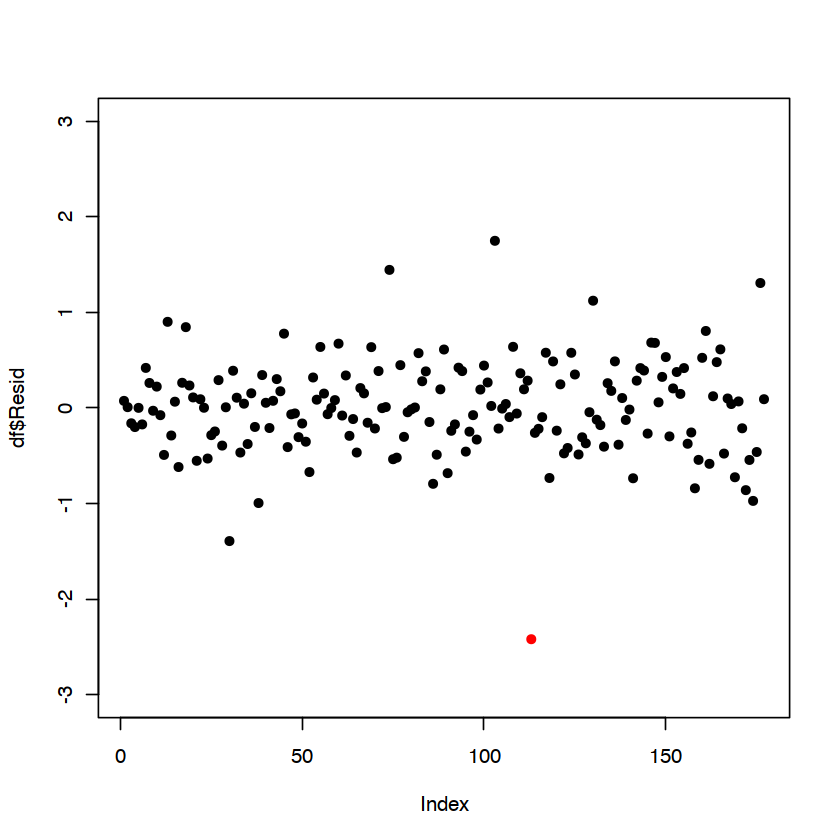

In [6]:
# g)

model <- lm(lsalary ~ lsales + lmktval + ceoten + I(ceoten^2), data = df)
summary(model)

# Store the residuals as a new column in DF
df$Resid<-resid(model)

# Find out what standard deviation is and save it to SD
SD<-sd(resid(model))
SD
#[1] 1.934118

# Make df$Outs 1 if a residual is 2 st. deviations from the mean, 0 otherwise
df$Outs<-ifelse(abs(df$Resid)>2, 1, 0)

# Plot this, note that df$Outs is used to set the color of the points.
plot(df$Resid, col=df$Outs+1, pch=16,ylim=c(-3,3))

df2<-df[!df$Outs,]
nrow(df2)

model <- lm(lsalary ~ lsales + lmktval + ceoten + I(ceoten^2), data = df2)
summary(model)

One outlier observation is erased. Estimation doesn't change much. The absolute value of the Residual is smaller.

2. a)

In [7]:
df = read_dta('HW2data/local_returns.dta')

head(df, n=10)

describe(df)

permno,year,ret,city,ind,date,city_returns,MRP,HML,RF,MOM,indret
10001,2000,-0.04411765,4,8,480,-0.024553183,-0.0474,0.0026,0.0041,0.0188,0.06220017
10001,2000,0.01538462,4,8,481,0.045873884,0.0245,-0.1261,0.0043,0.1838,-0.04722921
10001,2000,-0.01575758,4,8,482,0.039057303,0.0520,0.0765,0.0047,-0.0680,0.04546719
10001,2000,0.01171875,4,8,483,-0.009810019,-0.0640,0.0909,0.0046,-0.0852,0.06599442
10001,2000,-0.02316602,4,8,484,-0.014000371,-0.0442,0.0372,0.0050,-0.0906,0.01546620
10001,2000,0.02766798,4,8,485,0.017856063,0.0464,-0.1002,0.0040,0.1649,-0.04741758
10001,2000,-0.01562500,4,8,486,-0.024038998,-0.0251,0.0849,0.0048,-0.0012,0.05848411
10001,2000,0.04761905,4,8,487,0.046162717,0.0703,-0.0123,0.0050,0.0570,0.08447938
10001,2000,0.07575758,4,8,488,-0.056319110,-0.0545,0.0680,0.0051,0.0215,0.08525627
10001,2000,0.02857143,4,8,489,-0.038856588,-0.0276,0.0481,0.0056,-0.0463,-0.01193680


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
permno,1,487582,7.314106e+04,2.287533e+04,8.226600e+04,7.802008e+04,9.052756e+03,10001.0000000,9.343600e+04,8.343500e+04,-1.67125375,1.5471733,3.275997e+01
year,2,487582,2.004691e+03,3.183826e+00,2.005000e+03,2.004642e+03,4.447800e+00,2000.0000000,2.010000e+03,1.000000e+01,0.09631416,-1.2306167,4.559586e-03
ret,3,487582,9.539058e-03,2.014029e-01,3.501246e-03,1.316916e-03,1.012550e-01,-0.9812950,1.577419e+01,1.675549e+01,5.28303290,178.2724340,2.884310e-04
city,4,487582,1.037438e+01,5.677870e+00,1.100000e+01,1.038320e+01,7.413000e+00,1.0000000,2.000000e+01,1.900000e+01,-0.13227988,-1.1610077,8.131331e-03
ind,5,487582,8.313828e+00,3.230602e+00,1.000000e+01,8.633593e+00,2.965200e+00,1.0000000,1.200000e+01,1.100000e+01,-0.68673168,-0.7562050,4.626575e-03
date,6,487582,5.417539e+02,3.837035e+01,5.410000e+02,5.411328e+02,5.040840e+01,480.0000000,6.110000e+02,1.310000e+02,0.09431010,-1.2119840,5.495053e-02
city_returns,7,487582,9.939600e-03,7.437942e-02,1.207767e-02,1.014324e-02,6.383162e-02,-0.2995035,4.834211e-01,7.829247e-01,0.25258305,2.2089077,1.065195e-04
MRP,8,487582,-9.835105e-04,4.882494e-02,7.200000e-03,1.166263e-03,4.225410e-02,-0.1723000,1.019000e-01,2.742000e-01,-0.50444533,0.2611182,6.992265e-05
HML,9,487582,7.280835e-03,3.914370e-02,4.800000e-03,7.296705e-03,2.994852e-02,-0.1261000,1.388000e-01,2.649000e-01,-0.02229084,2.3166616,5.605805e-05
RF,10,487582,2.188636e-03,1.647734e-03,1.600000e-03,2.105482e-03,2.223900e-03,0.0000000,5.600000e-03,5.600000e-03,0.33656495,-1.2183707,2.359735e-06


In [8]:
summary(df)

     permno           year           ret                 city      
 Min.   :10001   Min.   :2000   Min.   :-0.981295   Min.   : 1.00  
 1st Qu.:75162   1st Qu.:2002   1st Qu.:-0.067999   1st Qu.: 5.00  
 Median :82266   Median :2005   Median : 0.003501   Median :11.00  
 Mean   :73141   Mean   :2005   Mean   : 0.009539   Mean   :10.37  
 3rd Qu.:87428   3rd Qu.:2007   3rd Qu.: 0.068768   3rd Qu.:15.00  
 Max.   :93436   Max.   :2010   Max.   :15.774193   Max.   :20.00  
      ind              date        city_returns           MRP            
 Min.   : 1.000   Min.   :480.0   Min.   :-0.29950   Min.   :-0.1723000  
 1st Qu.: 6.000   1st Qu.:507.0   1st Qu.:-0.03319   1st Qu.:-0.0276000  
 Median :10.000   Median :541.0   Median : 0.01208   Median : 0.0072000  
 Mean   : 8.314   Mean   :541.8   Mean   : 0.00994   Mean   :-0.0009835  
 3rd Qu.:11.000   3rd Qu.:575.0   3rd Qu.: 0.05347   3rd Qu.: 0.0323000  
 Max.   :12.000   Max.   :611.0   Max.   : 0.48342   Max.   : 0.1019000  
      

It is an Unbalanced panel where the dataset does not have the same number of observations for all groups.

In [9]:
# b)

describeBy(df, group = df$city)


 Descriptive statistics by group 
group: 1
             vars     n     mean       sd   median  trimmed     mad      min
permno          1 19626 71275.38 24048.67 80969.00 76104.40 8520.50 10149.00
year            2 19626  2004.56     3.14  2004.00  2004.48    4.45  2000.00
ret             3 19626     0.01     0.20     0.00     0.00    0.11    -0.91
city            4 19626     1.00     0.00     1.00     1.00    0.00     1.00
ind             5 19626     7.90     3.44     9.00     8.18    4.45     1.00
date            6 19626   540.12    37.85   539.00   539.20   48.93   480.00
city_returns    7 19626     0.01     0.07     0.01     0.01    0.06    -0.23
MRP             8 19626     0.00     0.05     0.01     0.00    0.04    -0.17
HML             9 19626     0.01     0.04     0.00     0.01    0.03    -0.13
RF             10 19626     0.00     0.00     0.00     0.00    0.00     0.00
MOM            11 19626     0.00     0.07     0.01     0.01    0.04    -0.35
indret         12 19626     0.01

Very minimal difference. The city returns are mostly 0.01 or 0.02 in some cities.

In [10]:
# c) d)

library("plm")

model <- plm(ret ~ city_returns + indret,index=c("permno", "date"), data = df)
summary(model)

Loading required package: Formula


Attaching package: ‘plm’


The following objects are masked from ‘package:dplyr’:

    between, lag, lead




Oneway (individual) effect Within Model

Call:
plm(formula = ret ~ city_returns + indret, data = df, index = c("permno", 
    "date"))

Unbalanced Panel: n = 6783, T = 1-132, N = 487582

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-1.3028196 -0.0743791 -0.0076208  0.0565786 14.9961571 

Coefficients:
              Estimate Std. Error t-value  Pr(>|t|)    
city_returns 0.2111358  0.0051836  40.732 < 2.2e-16 ***
indret       0.8540338  0.0050137 170.341 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    19431
Residual Sum of Squares: 16496
R-Squared:      0.15108
Adj. R-Squared: 0.1391
F-statistic: 42782.4 on 2 and 480797 DF, p-value: < 2.22e-16

In [11]:
# e) 

bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 736.88, df = 2, p-value < 2.2e-16


We reject the null. We do have sufficient evidence to say that heteroscedasticity is present in the regression model.

In [12]:
# f)

model <- plm(ret ~ city_returns + indret + date, index=c("permno", "date"), data = df)
summary(model)

Oneway (individual) effect Within Model

Call:
plm(formula = ret ~ city_returns + indret + date, data = df, 
    index = c("permno", "date"))

Unbalanced Panel: n = 6783, T = 1-132, N = 487582

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-1.3172194 -0.0742259 -0.0072598  0.0562333 15.0178772 

Coefficients:
                Estimate  Std. Error  t-value  Pr(>|t|)    
city_returns  0.17277321  0.01019861  16.9409 < 2.2e-16 ***
indret        0.87042925  0.00608173 143.1219 < 2.2e-16 ***
date481      -0.01469878  0.00397861  -3.6944 0.0002204 ***
date482       0.00059693  0.00395027   0.1511 0.8798872    
date483      -0.02706167  0.00435009  -6.2209 4.946e-10 ***
date484      -0.01540314  0.00418080  -3.6843 0.0002294 ***
date485       0.01006621  0.00389339   2.5855 0.0097251 ** 
date486      -0.00548138  0.00401274  -1.3660 0.1719412    
date487       0.00518830  0.00388003   1.3372 0.1811638    
date488      -0.01384898  0.00407854  -3.3956 0.0006849 ***
date489 

In [13]:
# g) 

model_0 <- plm(ret ~ city_returns + indret + date + permno, index=c("permno", "date"), data = df)
summary(model_0)

# Out of computational power of my labtop. Kernel keeps dying

Not much difference is observed.

In [14]:
# h) 


vcovDC <- function(x, ...){
  vcovHC(x, cluster="permno", ...) + vcovHC(x, cluster="date", ...) - 
    vcovHC(x, method="white1", ...)
}

testamk <- plm(ret ~ city_returns + indret + date + permno, nd, model='within', index=c('permno', 'date'))
summary(testamk)

coeftest(testamk, vcov=function(x) vcovHC(x, cluster="group", type="HC1"))

In [15]:
# i)

model_1 <- plm(ret ~ city_returns + indret + permno, index=c("permno", "date"), data = df, model="within")
summary(model_1)

# Out of computational power of my labtop. Kernel keeps dying

In [16]:
# j) yes

model_2 <- plm(ret ~ city_returns + indret , index=c("permno", "date"), data = df, model="fd")
summary(model_2)

Oneway (individual) effect First-Difference Model

Call:
plm(formula = ret ~ city_returns + indret, data = df, model = "fd", 
    index = c("permno", "date"))

Unbalanced Panel: n = 6783, T = 1-132, N = 487582
Observations used in estimation: 480799

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-1.3635e+01 -9.6285e-02 -2.5202e-04  9.4355e-02  1.6300e+01 

Coefficients:
                Estimate  Std. Error t-value Pr(>|t|)    
(Intercept)  -0.00024950  0.00038326  -0.651    0.515    
city_returns  0.21734628  0.00556280  39.071   <2e-16 ***
indret        0.84736463  0.00526530 160.934   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    38744
Residual Sum of Squares: 33955
R-Squared:      0.1236
Adj. R-Squared: 0.12359
F-statistic: 33903.2 on 2 and 480796 DF, p-value: < 2.22e-16

k) city returns has more positive and significant in j) FD compared to f) Pooled OLS

In [17]:
#l) yes

df$dummySF <- ifelse(df$city == 10, 1, 0)

model_4 <- plm(ret ~ city_returns + indret + I(dummySF*city_returns),index=c("permno", "date"), data = df)
summary(model_4)

Oneway (individual) effect Within Model

Call:
plm(formula = ret ~ city_returns + indret + I(dummySF * city_returns), 
    data = df, index = c("permno", "date"))

Unbalanced Panel: n = 6783, T = 1-132, N = 487582

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-1.3030519 -0.0743536 -0.0076351  0.0565589 14.9963717 

Coefficients:
                           Estimate Std. Error  t-value Pr(>|t|)    
city_returns              0.2091046  0.0052961  39.4825  < 2e-16 ***
indret                    0.8540236  0.0050136 170.3398  < 2e-16 ***
I(dummySF * city_returns) 0.0239767  0.0128200   1.8703  0.06145 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    19431
Residual Sum of Squares: 16495
R-Squared:      0.15108
Adj. R-Squared: 0.1391
F-statistic: 28522.9 on 3 and 480796 DF, p-value: < 2.22e-16

The coefficient

3. a)

In [18]:
df = read_dta('HW2data/pension.dta')

head(df, n=10)

model_5 <- lm(pira ~ p401k + inc + I(inc^2) + age + I(age^2), data = df)
summary(model_5)

e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,61.230,0,1,35,1,154.000,1,0,3749.1128,1225
0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
0,98.880,1,1,44,2,21.800,0,0,9777.2539,1936
0,22.614,0,0,53,1,18.450,0,0,511.3930,2809
0,15.000,1,0,60,3,0.000,0,0,225.0000,3600
0,37.155,1,0,49,5,3.483,0,1,1380.4939,2401
0,31.896,1,0,38,5,-2.100,0,0,1017.3548,1444
0,47.295,1,0,52,2,5.290,0,1,2236.8169,2704
1,29.100,0,1,45,1,29.600,0,1,846.8100,2025



Call:
lm(formula = pira ~ p401k + inc + I(inc^2) + age + I(age^2), 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8855 -0.2629 -0.1198  0.1987  1.0625 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.977e-01  6.864e-02  -2.880  0.00398 ** 
p401k        5.366e-02  9.571e-03   5.606 2.13e-08 ***
inc          8.679e-03  5.110e-04  16.983  < 2e-16 ***
I(inc^2)    -2.280e-05  4.033e-06  -5.653 1.62e-08 ***
age         -1.594e-03  3.330e-03  -0.479  0.63228    
I(age^2)     1.173e-04  3.823e-05   3.068  0.00216 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3945 on 9269 degrees of freedom
Multiple R-squared:   0.18,	Adjusted R-squared:  0.1795 
F-statistic: 406.9 on 5 and 9269 DF,  p-value: < 2.2e-16


p401k has a small but positive effect on pira. 

b) OLS might only represent correlation and not causation. There might be other variables correlated with dependent variable and the error term at the same time causing biased estimate.

c) e401k should correlate with p401k but does not directly effect pira. It only affects pira through its effect on e401k. Not too reasonable. eligibility of 401k might effect pira through other factors such as income or marriage status.

In [20]:
# d) 
model_6 <- lm(p401k ~ e401k, data = df)
summary(model)

Oneway (individual) effect Within Model

Call:
plm(formula = ret ~ city_returns + indret + date, data = df, 
    index = c("permno", "date"))

Unbalanced Panel: n = 6783, T = 1-132, N = 487582

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-1.3172194 -0.0742259 -0.0072598  0.0562333 15.0178772 

Coefficients:
                Estimate  Std. Error  t-value  Pr(>|t|)    
city_returns  0.17277321  0.01019861  16.9409 < 2.2e-16 ***
indret        0.87042925  0.00608173 143.1219 < 2.2e-16 ***
date481      -0.01469878  0.00397861  -3.6944 0.0002204 ***
date482       0.00059693  0.00395027   0.1511 0.8798872    
date483      -0.02706167  0.00435009  -6.2209 4.946e-10 ***
date484      -0.01540314  0.00418080  -3.6843 0.0002294 ***
date485       0.01006621  0.00389339   2.5855 0.0097251 ** 
date486      -0.00548138  0.00401274  -1.3660 0.1719412    
date487       0.00518830  0.00388003   1.3372 0.1811638    
date488      -0.01384898  0.00407854  -3.3956 0.0006849 ***
date489 

In [30]:
# e)
library(AER)

iv1 = ivreg(pira ~ p401k | e401k , data = df)
summary(iv1)

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


Loading required package: survival




Call:
ivreg(formula = pira ~ p401k | e401k, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3631 -0.2128 -0.2128  0.6369  0.7872 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.212841   0.005732   37.13   <2e-16 ***
p401k       0.150233   0.012995   11.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4304 on 9273 degrees of freedom
Multiple R-Squared: 0.02342,	Adjusted R-squared: 0.02331 
Wald test: 133.7 on 1 and 9273 DF,  p-value: < 2.2e-16 


Now the estimate is more positive as not many controls are included